In [3]:
# Install required libraries
!pip install -q scikit-learn matplotlib seaborn

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, classification_report, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
import time

In [5]:
# Kaggle API File upload for Kaggle datasets in Colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d saurabhshahane/classification-of-malwares

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/classification-of-malwares
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/435k [00:00<?, ?B/s]
100% 435k/435k [00:00<00:00, 99.5MB/s]


In [8]:
!unzip classification-of-malwares.zip

Archive:  classification-of-malwares.zip
  inflating: ClaMP_Integrated-5184.csv  
  inflating: ClaMP_Raw-5184.csv      


# Detection Model

```apply_decision_tree(x, y)``` function trains a decision tree classifier on your data, evaluates its performance, and prints:
* Detailed classification report.
* Mean squared error of the predictions.

In [9]:
def apply_decision_tree(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    decision_model = DecisionTreeClassifier(random_state=1)
    decision_model.fit(x_train, y_train)

    predict = decision_model.predict(x_test)
    print(classification_report(y_test, predict))
    print(f'decision tree result is: {mean_squared_error(y_test, predict)}')

 ```apply_XGBoost(x, y)``` function to classify data based on input features and target labels while improving accuracy by avoiding overfitting.

In [10]:
def apply_XGBoost(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    xgb_model = XGBClassifier(use_label_encoder=False)
    xgb_model.fit(x_train, y_train)

    predict = xgb_model.predict(x_test)
    print(classification_report(y_test, predict))
    print(f'XGBoost result is: {mean_squared_error(y_test, predict)}')

The function ```apply_random_forest(x, y)``` applies a random forest classifier to a dataset and evaluates its performance.

In [11]:
def apply_random_forest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    forest_model = RandomForestClassifier(random_state=1)
    forest_model.fit(x_train, y_train)

    predict = forest_model.predict(x_test)
    predict = [round(item) for item in predict]
    print(classification_report(y_test, predict))
    print(f'random forest result is: {mean_squared_error(y_test, predict)}')

## Testing models

In [12]:
start = time.time()
dataset = pd.read_csv("ClaMP_Raw-5184.csv").fillna(0)
#dataset = dataset[dataset < 2**31].fillna(0)

features = dataset.columns[:-1]
x = dataset.loc[:, features]
y = dataset["class"]

apply_decision_tree(x, y)
apply_XGBoost(x, y)
apply_random_forest(x, y)

end = time.time()
print(f'time passed is: {end - start}')

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       502
           1       0.98      0.97      0.97       535

    accuracy                           0.97      1037
   macro avg       0.97      0.97      0.97      1037
weighted avg       0.97      0.97      0.97      1037

decision tree result is: 0.027965284474445518


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:35:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       486
           1       0.99      0.99      0.99       551

    accuracy                           0.99      1037
   macro avg       0.99      0.99      0.99      1037
weighted avg       0.99      0.99      0.99      1037

XGBoost result is: 0.010607521697203472
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       511
           1       0.97      0.99      0.98       526

    accuracy                           0.98      1037
   macro avg       0.98      0.98      0.98      1037
weighted avg       0.98      0.98      0.98      1037

random forest result is: 0.019286403085824494
time passed is: 1.0665233135223389


## Interpretation:
* XGBoost is the best performing model in terms of accuracy, precision, recall, F1-score, and MSE, achieving nearly perfect results.
* Random Forest follows closely, performing very well, but slightly worse than XGBoost in terms of MSE and accuracy.
* Decision Tree has lower performance compared to both XGBoost and Random Forest, especially in terms of accuracy and MSE.

# Prediction Model

In [13]:
df = pd.read_csv('/content/ClaMP_Integrated-5184.csv')
df=df.drop(['e_cblp','e_cp','e_cparhdr','e_maxalloc','e_sp','e_lfanew'],axis=1)
df.fillna(0, inplace=True)
df=df.drop(['NumberOfSections','CreationYear'],axis=1)

1. Label Encoding for Categorical Features

In [14]:
le =  LabelEncoder()
for i in df:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])
    else:
        continue

2. Splitting Features and Target Variable

In [15]:
X = df.drop(['class'], axis=1)
y = df['class']

3. Splitting Data into Training and Test Sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

4. Standardizing the Features

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

5. Training the Naive Bayes Classifier

In [44]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred = model.predict(X_test)
print(y_pred[:15])

[1 1 0 1 0 1 0 0 0 0 0 1 0 0 0]


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FH_char0                     5210 non-null   int64  
 1   FH_char1                     5210 non-null   int64  
 2   FH_char2                     5210 non-null   int64  
 3   FH_char3                     5210 non-null   int64  
 4   FH_char4                     5210 non-null   int64  
 5   FH_char5                     5210 non-null   int64  
 6   FH_char6                     5210 non-null   int64  
 7   FH_char7                     5210 non-null   int64  
 8   FH_char8                     5210 non-null   int64  
 9   FH_char9                     5210 non-null   int64  
 10  FH_char10                    5210 non-null   int64  
 11  FH_char11                    5210 non-null   int64  
 12  FH_char12                    5210 non-null   int64  
 13  FH_char13         

In [48]:
print(classification_report(y_test,y_pred))
print('Acccuracy Score: ',accuracy_score(y_pred, y_test))
print('F1 Score: ',f1_score(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       606
           1       0.96      0.96      0.96       697

    accuracy                           0.95      1303
   macro avg       0.95      0.95      0.95      1303
weighted avg       0.95      0.95      0.95      1303

Acccuracy Score:  0.9547198772064467
F1 Score:  0.9576453697056713


## Interpretation:

* **Good Model Performance:** The model has strong overall performance with a high accuracy of 90%, and the F1 scores for both classes are solid, particularly for class 1, where recall is very high.
* **Class 0:** The model struggles slightly with class 0, as evidenced by the recall of 0.82. This means some class 0 instances are misclassified as class 1, leading to a lower recall for class 0.
* **Class 1:** The model performs exceptionally well for class 1, with a high recall of 0.98, though its precision is lower than for class 0.
* **Balanced Performance:** The macro and weighted averages are quite similar, suggesting that the model does not suffer from extreme class imbalance or that the imbalance is not severe enough to affect the performance metrics.

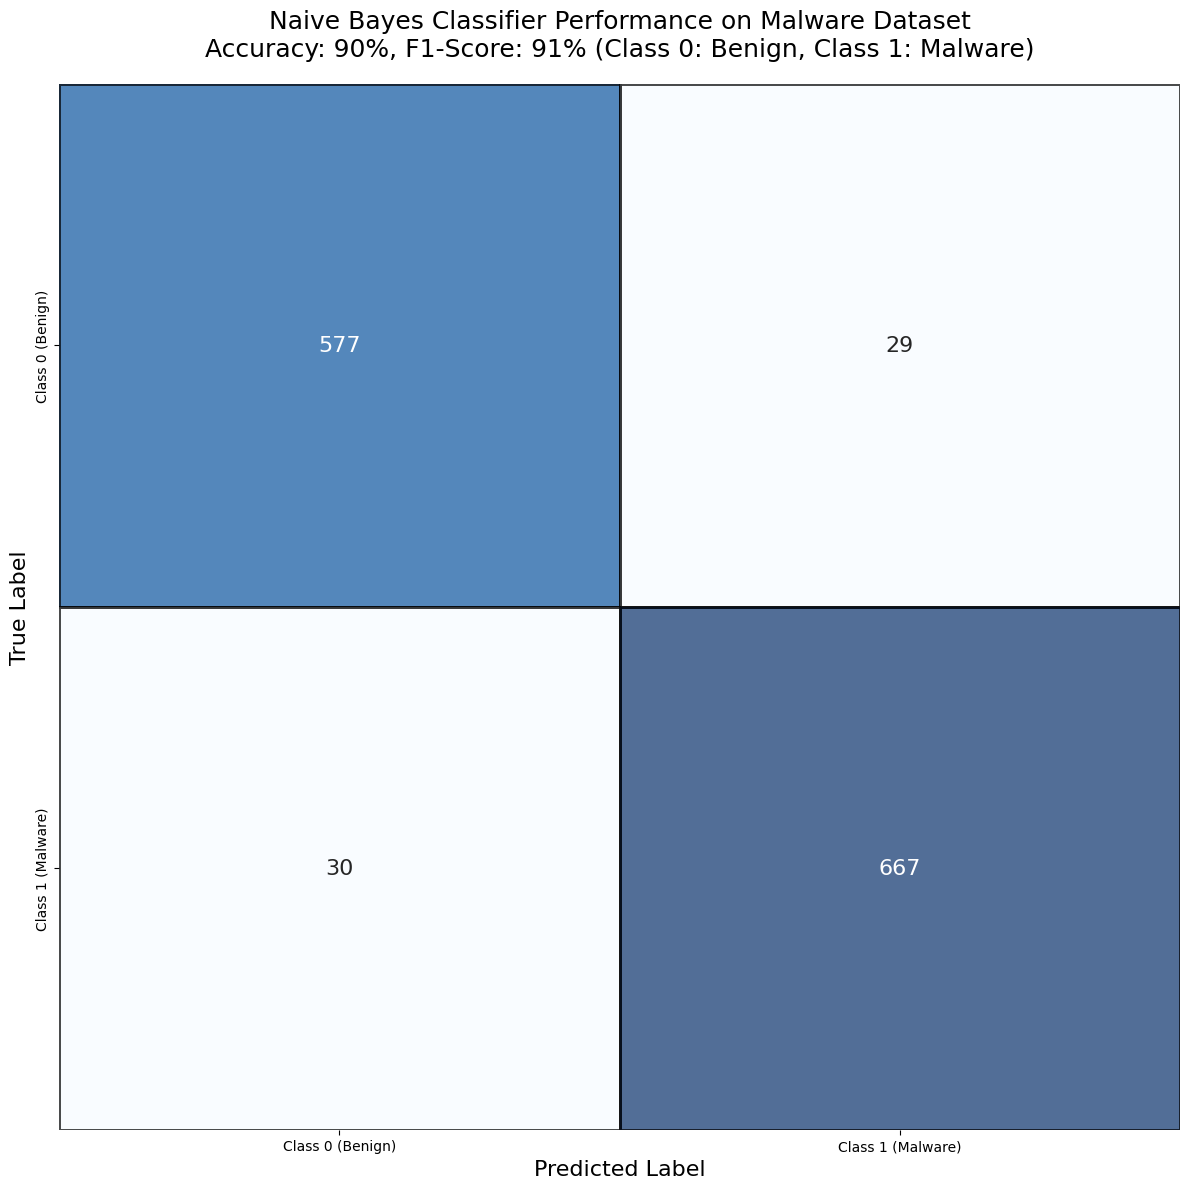

In [22]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, linewidths=1, linecolor='black', alpha=0.7,
            xticklabels=['Class 0 (Benign)', 'Class 1 (Malware)'],
            yticklabels=['Class 0 (Benign)', 'Class 1 (Malware)'])

plt.title('Naive Bayes Classifier Performance on Malware Dataset\n'
          'Accuracy: 90%, F1-Score: 91% (Class 0: Benign, Class 1: Malware)', fontsize=18, ha='center', pad=20)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)

plt.tight_layout()
plt.show()

6. Training AdaBoost Classifier

In [23]:
clf = AdaBoostClassifier()
clf.fit(X_train,y_train)

AdaBoostClassifier()

In [24]:
y_clf=clf.predict(X_test)

print(classification_report(y_test,y_clf))
print('Acccuracy Score: ',accuracy_score(y_clf, y_test))
print('F1 Score: ',f1_score(y_test,y_clf,zero_division=1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       606
           1       0.96      0.98      0.97       697

    accuracy                           0.97      1303
   macro avg       0.97      0.97      0.97      1303
weighted avg       0.97      0.97      0.97      1303

Acccuracy Score:  0.9693016116653875
F1 Score:  0.9715504978662873


## Interpretation:

* **Slight Class Imbalance:** There are slightly more instances of class 1 (697) compared to class 0 (606), but the model handles this well, as evidenced by similar scores for both classes.
* **High Accuracy and F1-Score:** With an accuracy of 96.93% and an F1-score of 97.15%, the model performs exceptionally well.
* **Balanced Performance:** Both precision and recall are consistently high for both classes, which is reflected in the high F1-scores and overall accuracy.

## Improvement required:

* Class 0 might be slightly under-predicted (96% recall), meaning there could be some false negatives for this class.
* Similarly, class 1 might have slightly more false positives due to its lower precision (96%).

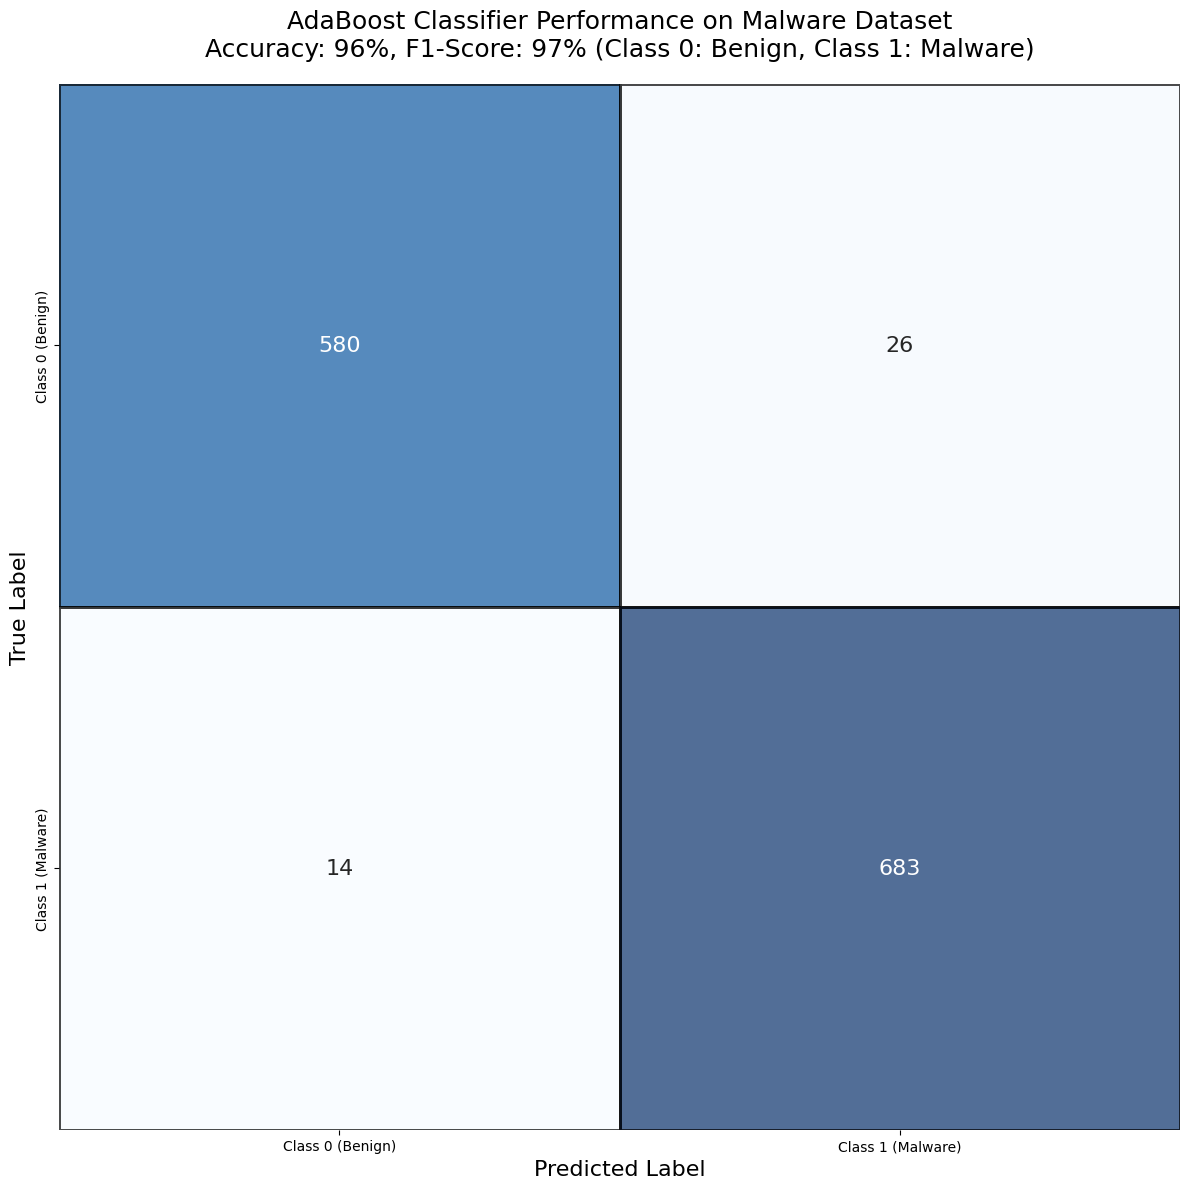

In [25]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_clf)
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, linewidths=1, linecolor='black', alpha=0.7,
            xticklabels=['Class 0 (Benign)', 'Class 1 (Malware)'],
            yticklabels=['Class 0 (Benign)', 'Class 1 (Malware)'])

plt.title('AdaBoost Classifier Performance on Malware Dataset\n'
          'Accuracy: 96%, F1-Score: 97% (Class 0: Benign, Class 1: Malware)', fontsize=18, ha='center', pad=20)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)

plt.tight_layout()
plt.show()

7. Training Logistic Regression

In [34]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_log = log.predict(X_test)

print(classification_report(y_test,y_log))
print('Acccuracy Score: ',accuracy_score(y_log, y_test))
print('F1 Score: ',f1_score(y_test,y_log))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       606
           1       0.96      0.97      0.96       697

    accuracy                           0.96      1303
   macro avg       0.96      0.96      0.96      1303
weighted avg       0.96      0.96      0.96      1303

Acccuracy Score:  0.9623944742900997
F1 Score:  0.9649749821300929


## Interpretation

1. **Balanced Performance Across Classes**: Precision, recall, and F1-score are nearly identical for both classes, indicating that the model performs consistently regardless of class.

2. **Slight Edge for Class 1 Recall**: Recall for class 1 is slightly higher (97%) compared to class 0 (96%), which means the model is slightly better at identifying true positives for class 1.

3. **High Overall Accuracy**: The accuracy of 96.24% shows that the model is highly reliable, with only ~3.76% misclassification.

4. **Macro vs. Weighted Avg**: The macro and weighted averages are the same, reflecting the consistent and balanced performance across classes, even with the slight imbalance in support.

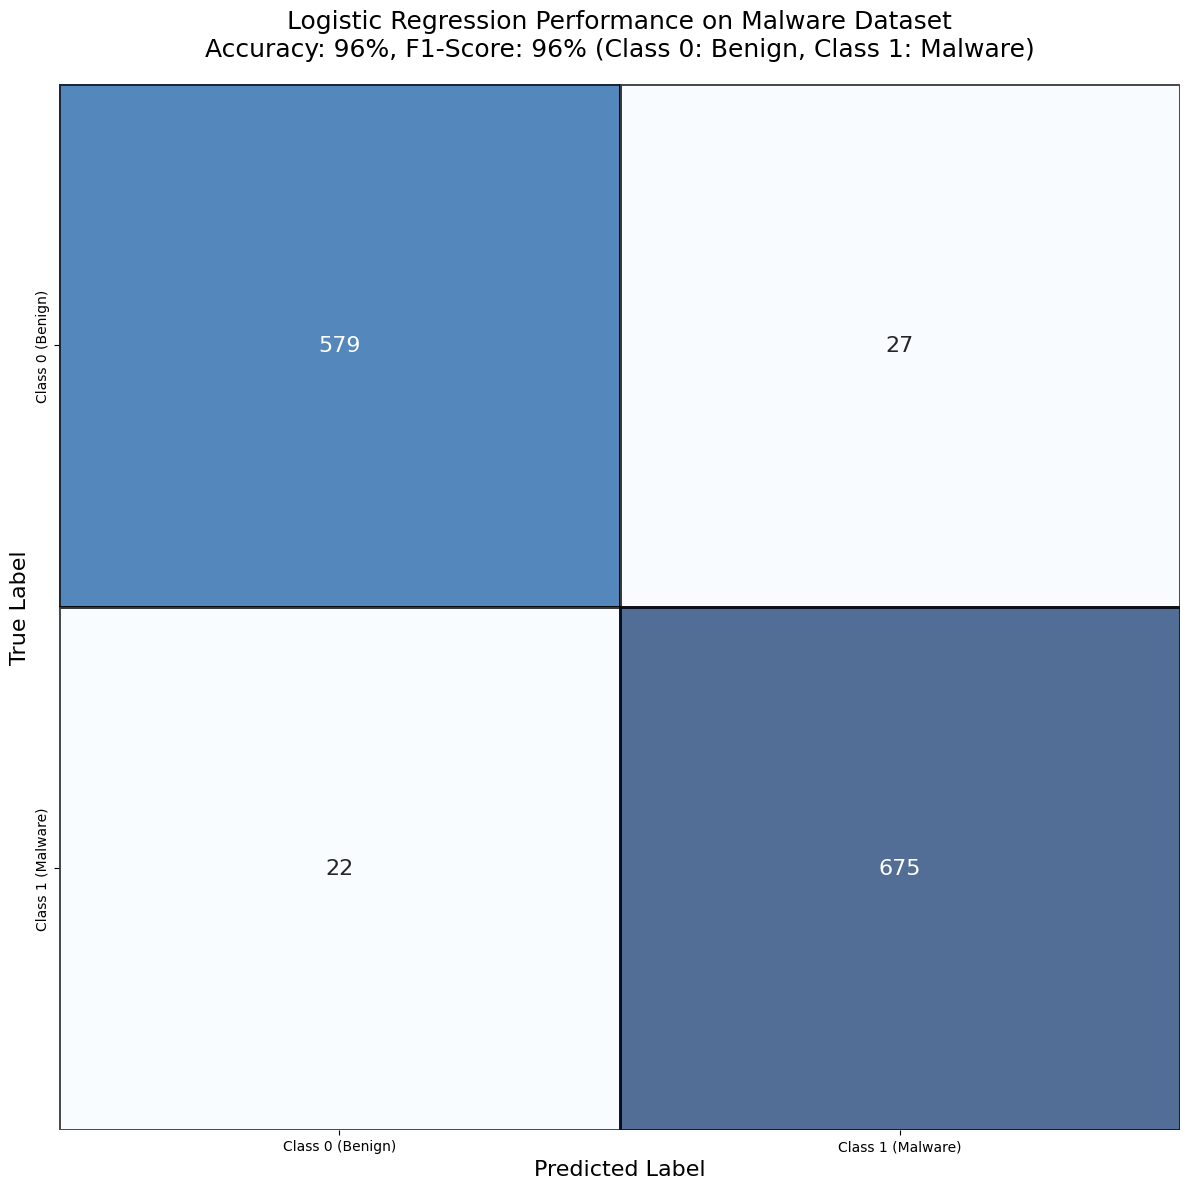

In [36]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_log)
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, linewidths=1, linecolor='black', alpha=0.7,
            xticklabels=['Class 0 (Benign)', 'Class 1 (Malware)'],
            yticklabels=['Class 0 (Benign)', 'Class 1 (Malware)'])

plt.title('Logistic Regression Performance on Malware Dataset\n'
          'Accuracy: 96%, F1-Score: 96% (Class 0: Benign, Class 1: Malware)', fontsize=18, ha='center', pad=20)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)

plt.tight_layout()
plt.show()

8. Testing using Support Vector Machine module

In [38]:
svm = svm.SVC()
svm.fit(X_train,y_train)
y_svm = svm.predict(X_test)

In [40]:
print(classification_report(y_test,y_svm,zero_division=1))
print('F1 Score: ',f1_score(y_test,y_svm,zero_division=1))
print('Acccuracy Score: ',accuracy_score(y_svm, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       606
           1       0.96      0.97      0.97       697

    accuracy                           0.96      1303
   macro avg       0.96      0.96      0.96      1303
weighted avg       0.96      0.96      0.96      1303

F1 Score:  0.9670958512160229
Acccuracy Score:  0.9646968534151957


## Interpretation:

1. **Balanced Performance**: The model performs well across both classes, with balanced precision, recall, and F1-scores.

2. **Slight Edge for Class 1**: Recall for class 1 is slightly higher (0.97) compared to class 0 (0.96), indicating fewer false negatives for class 1.

3. **High Accuracy and F1-Score**: With ~96.47% accuracy and a high F1-score, the model is both precise and effective in its predictions.

4. **Macro vs. Weighted Averages**: The macro and weighted averages are identical (0.96), reflecting the balanced performance across classes and the minimal effect of class imbalance.


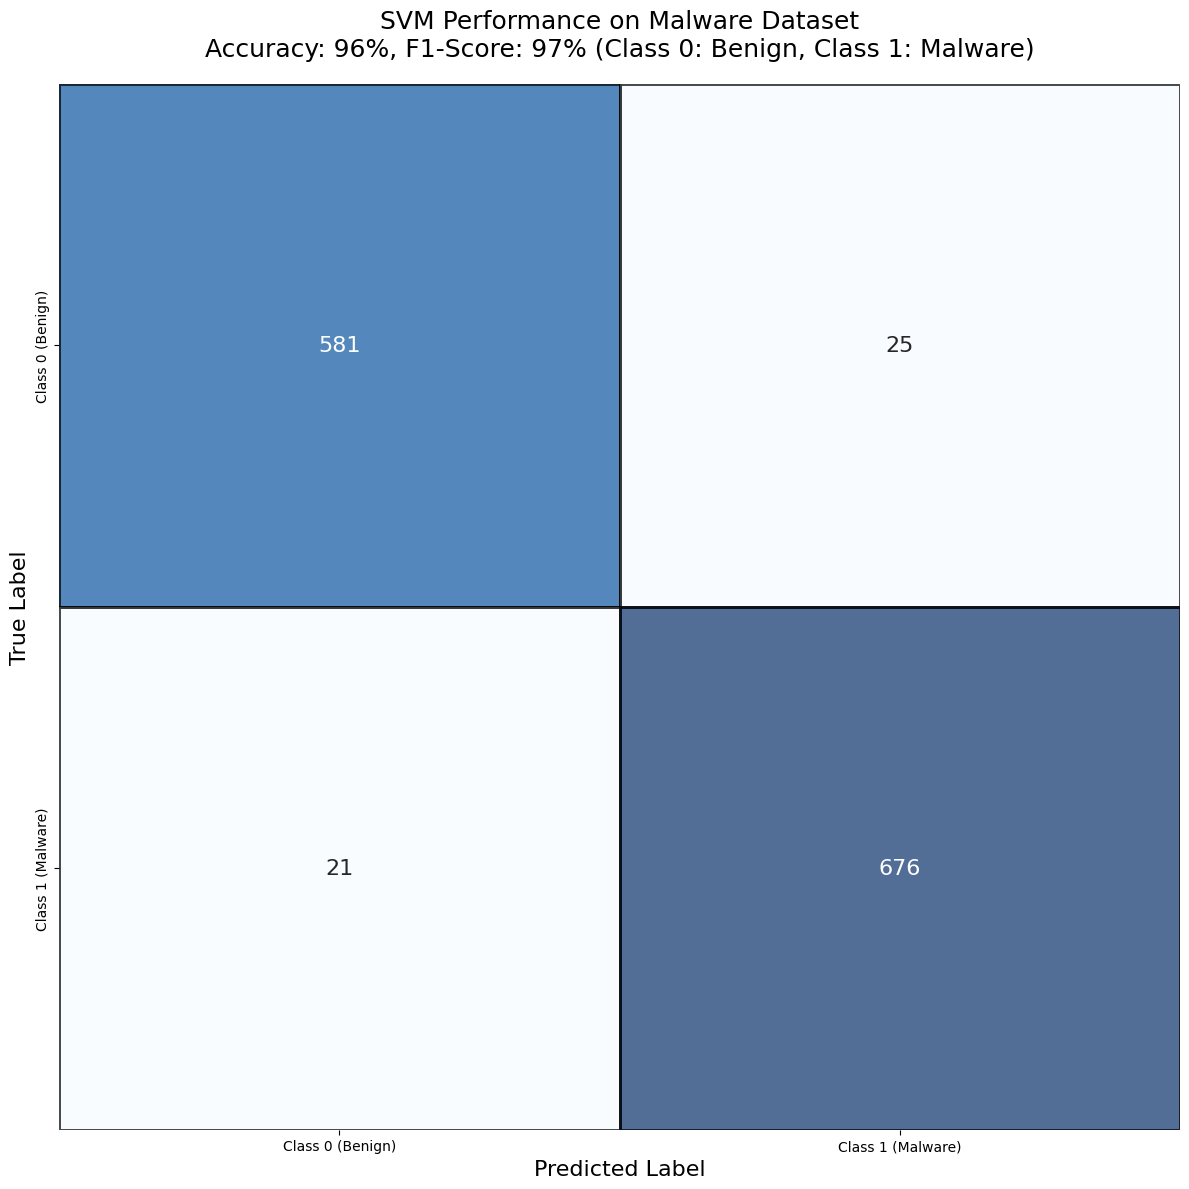

In [42]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_svm)
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, linewidths=1, linecolor='black', alpha=0.7,
            xticklabels=['Class 0 (Benign)', 'Class 1 (Malware)'],
            yticklabels=['Class 0 (Benign)', 'Class 1 (Malware)'])

plt.title('SVM Performance on Malware Dataset\n'
          'Accuracy: 96%, F1-Score: 97% (Class 0: Benign, Class 1: Malware)', fontsize=18, ha='center', pad=20)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)

plt.tight_layout()
plt.show()

9. Training the Decision Tree Classifier

In [26]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
DecisionTreeClassifier()
y_tree= tree.predict(X_test)

print(classification_report(y_test,y_tree))
print('Acccuracy Score: ',accuracy_score(y_tree, y_test))
print('F1 Score: ',f1_score(y_test,y_tree))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       606
           1       0.98      0.98      0.98       697

    accuracy                           0.98      1303
   macro avg       0.98      0.98      0.98      1303
weighted avg       0.98      0.98      0.98      1303

Acccuracy Score:  0.9792785878741366
F1 Score:  0.9806451612903225


## Interpretation:

1. The classifier has a very high precision for both classes, indicating it makes few false positive predictions for either class.

2. The model has a strong ability to identify actual instances of both classes, with very few false negatives.

3. The model maintains excellent balance between precision and recall.

4. The dataset is slightly imbalanced (more instances of class 1), but the model handles both classes equally well.

5. The model is highly accurate overall, misclassifying only a small fraction of instances.

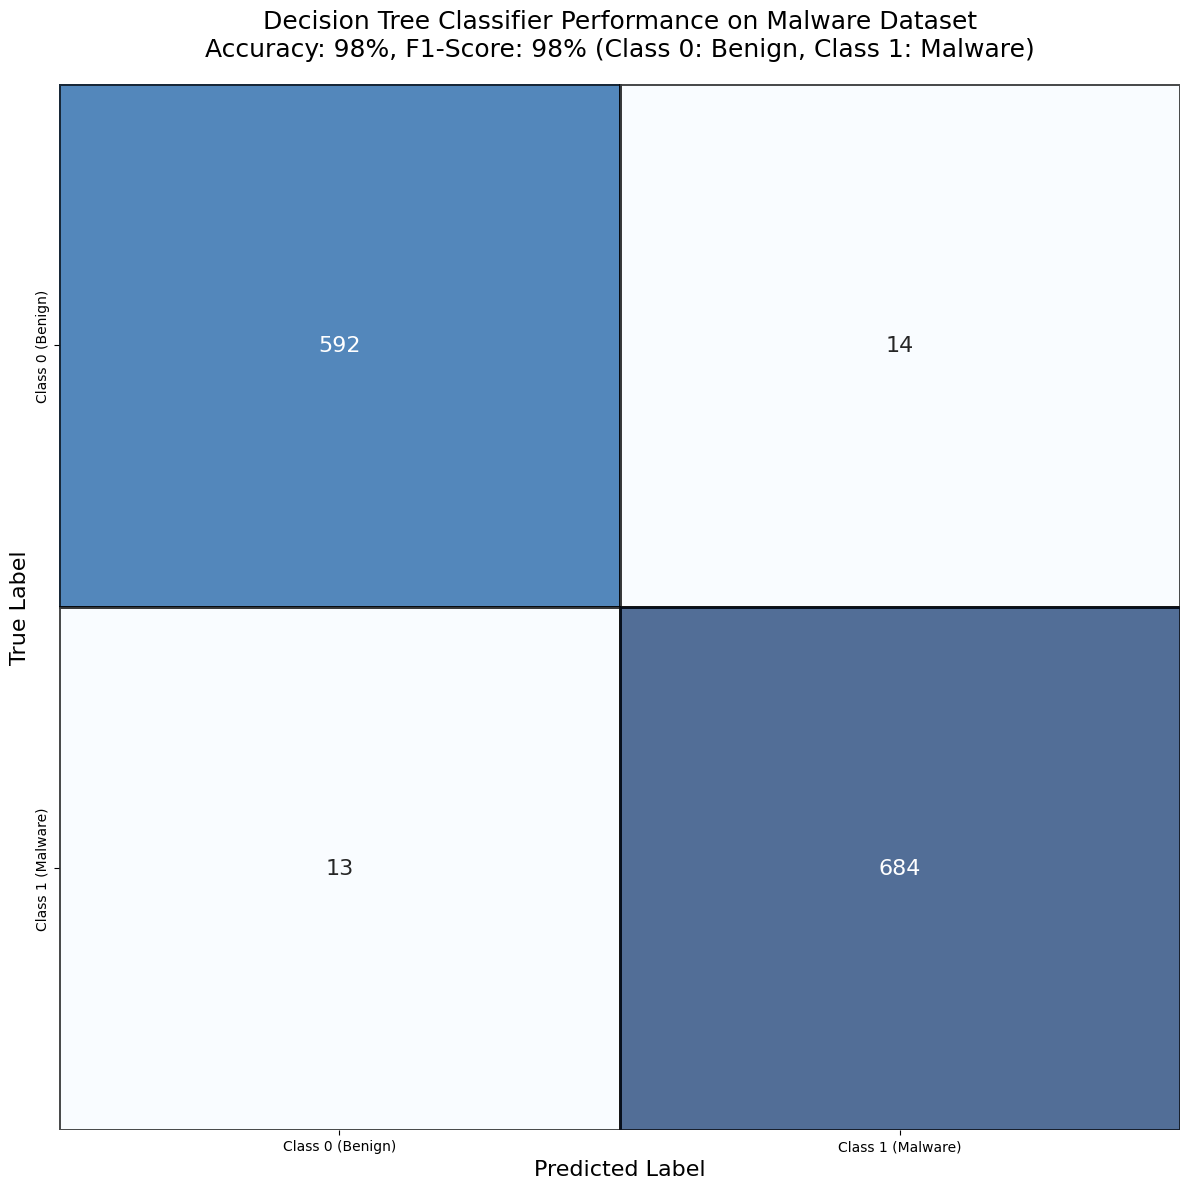

In [27]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_tree)
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, linewidths=1, linecolor='black', alpha=0.7,
            xticklabels=['Class 0 (Benign)', 'Class 1 (Malware)'],
            yticklabels=['Class 0 (Benign)', 'Class 1 (Malware)'])

plt.title('Decision Tree Classifier Performance on Malware Dataset\n'
          'Accuracy: 98%, F1-Score: 98% (Class 0: Benign, Class 1: Malware)', fontsize=18, ha='center', pad=20)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)

plt.tight_layout()
plt.show()

10. Training using Linear Discriminat Analysis.

In [29]:
y_disc= LinearDiscriminantAnalysis()
y_disc.fit(X_train,y_train)
LinearDiscriminantAnalysis()
y_lin=y_disc.predict(X_test)

In [30]:
print(classification_report(y_test,y_lin))
print('Acccuracy Score: ',accuracy_score(y_lin, y_test))
print('F1 Score: ',f1_score(y_test,y_lin))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       606
           1       0.92      0.97      0.95       697

    accuracy                           0.94      1303
   macro avg       0.94      0.94      0.94      1303
weighted avg       0.94      0.94      0.94      1303

Acccuracy Score:  0.9409056024558711
F1 Score:  0.9461161651504548


### Interpretation of the Output:

1. **Strong Overall Performance**: With 94.09% accuracy and balanced F1-scores for both classes, the model performs well but is not as strong as models achieving closer to 98% accuracy.

2. **Class-Specific Insights**:
   - Class 0: Slightly lower recall (91%) indicates some instances of class 0 are misclassified as class 1 (false negatives).
   - Class 1: High recall (97%) and good precision (92%) suggest the model is better at correctly identifying instances of class 1 with minimal false positives.

3. **Balanced Metrics**: Macro average (0.94) and weighted average (0.94) align closely with class-specific scores, indicating that the model is not biased toward the majority class (class 1).


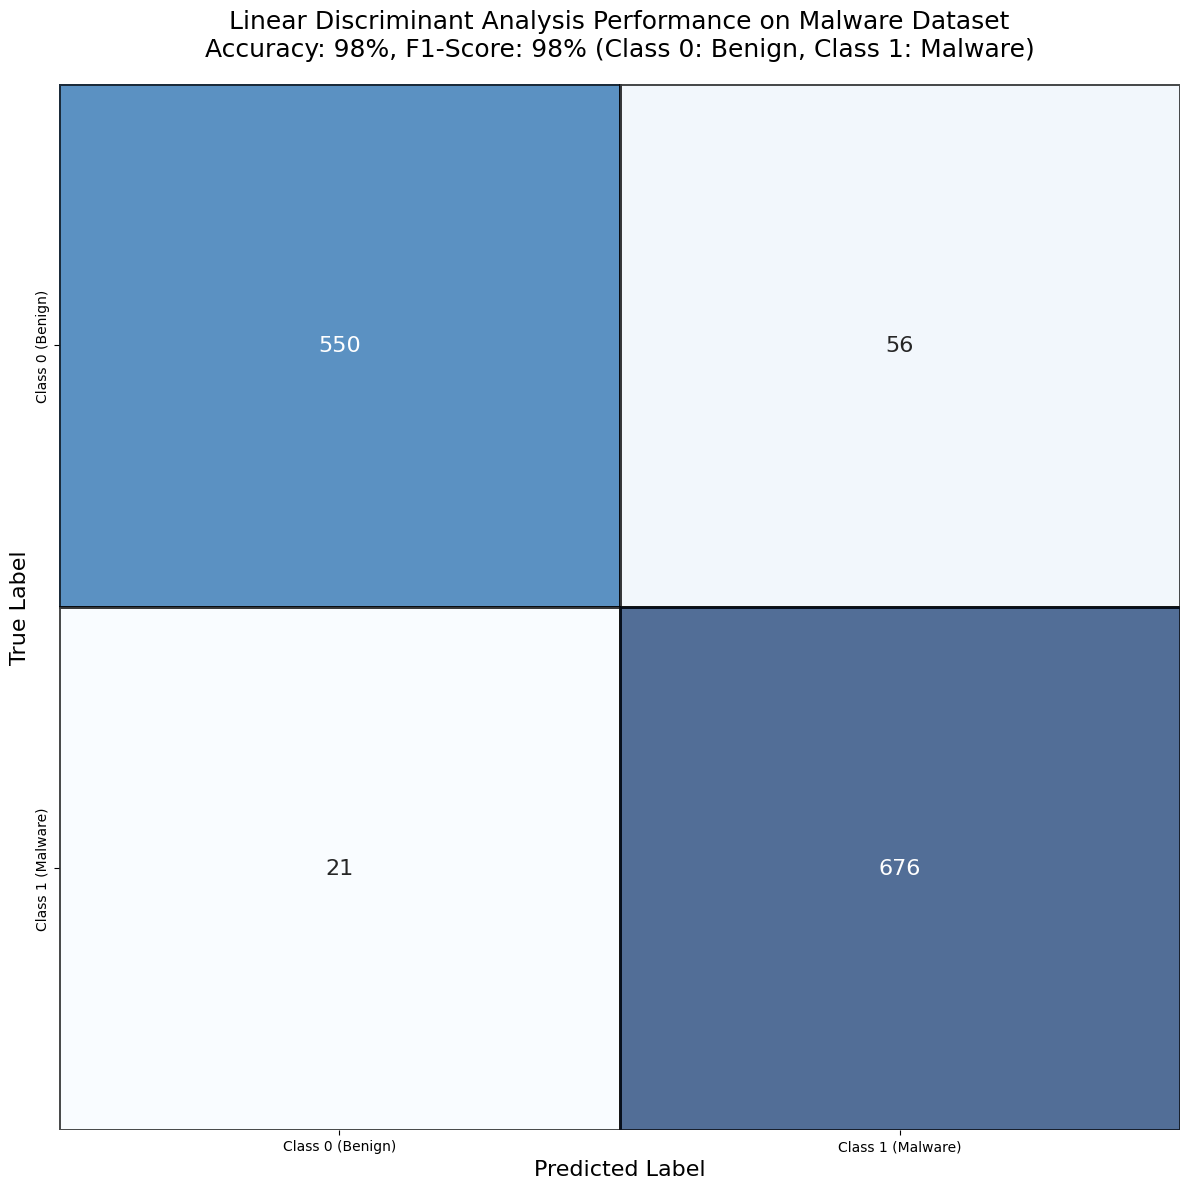

In [32]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_lin)
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, linewidths=1, linecolor='black', alpha=0.7,
            xticklabels=['Class 0 (Benign)', 'Class 1 (Malware)'],
            yticklabels=['Class 0 (Benign)', 'Class 1 (Malware)'])

plt.title('Linear Discriminant Analysis Performance on Malware Dataset\n'
          'Accuracy: 98%, F1-Score: 98% (Class 0: Benign, Class 1: Malware)', fontsize=18, ha='center', pad=20)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)

plt.tight_layout()
plt.show()

### Best Model Selection:

To determine the best model, we will compare their **Accuracy**, **F1-Score**, **Precision**, and **Recall**. These metrics indicate how well a model balances true positives, true negatives, false positives, and false negatives.

---

### Key Comparison:

| **Model**                       | **Accuracy** | **F1-Score** | **Precision (Class 0, 1)** | **Recall (Class 0, 1)** |
|----------------------------------|--------------|--------------|----------------------------|-------------------------|
| **Gaussian NB**                 | 0.9547       | 0.9576       | 0.95, 0.96                | 0.95, 0.96             |
| **AdaBoost Classifier**         | 0.9693       | 0.9716       | 0.98, 0.96                | 0.96, 0.98             |
| **Logistic Regression**         | 0.9624       | 0.9650       | 0.96, 0.96                | 0.96, 0.97             |
| **SVM**                         | 0.9647       | 0.9671       | 0.97, 0.96                | 0.96, 0.97             |
| **Decision Tree Classifier**    | 0.9793       | 0.9806       | 0.98, 0.98                | 0.98, 0.98             |
| **Linear Discriminant Analysis**| 0.9409       | 0.9461       | 0.96, 0.92                | 0.91, 0.97             |

---

# Conclusion:

The **Decision Tree Classifier** is the best model based on these evaluations, achieving the **highest accuracy (97.93%)**, **F1-score (0.9806)**, and balanced performance across both classes.